<a href="https://colab.research.google.com/github/FerrazThales/Artigos/blob/main/arvores_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo as árvores de decisão

Árvores de decisão (*Decision Trees*), como o próprio nome se refere, é um dos métodos mais utilizados para a tomada de decisão. Esta abordagem é amplamente utilizada em modelos de *machine learning*, mas também encontra espaço em outras áreas, como a [pesquisa operacional](https://en.wikipedia.org/wiki/Decision_tree).

Existem [vários algortimos](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.685.4929&rep=rep1&type=pdf) que podem ser utilizados nesta árvores, dentre eles o ID3, C4.5 e o CART. O foco será esta última abordagem que é a utilizada pelo [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart). Ela se baseia na separação binária (True | False) de condições utilizando os atributos dos dados.

Estes modelos de **aprendizado supervisionado** são empregados em tarefas tanto de regressão quanto classificação. O objetivo do método é criar uma árvore que aprende com os dados através de regras básicas, chamadas de *if-then rules*. O modelo identifica qual é o melhor atributo para separar os dados utilizando o critério escolhido, que pode ser *entropy* ou *gini*.


É um método robusto to noisy data and capable of learning disjunctive expressions.



A imagem abaixo, ilustra um exemplo geral destas árvores com alguns conceitos que são utilizados:

<img src='https://github.com/FerrazThales/Artigos/blob/main/decision_tree/decision_tree.drawio.png?raw=true' >

**Vantagens:**
* É um modelo intuitivo e simples de interpretar. Além disso, as árvores de decisão podem ser visualizadas.
* Não necessita de grandes pré-processamento de dados, como a normalização ou escalonamento de dados.
* Utiliza o modelo conhecido como caixa branca. Ou seja, as decisões que o modelo toma podem ser explicadas e interpretadas.

**Desvantagens**:
* Pode criar regras muito complexas que vão gerar *overfitting* nos dados.
* Podem ser instáveis, pequenas variações podem gerar modelos de árvore completamente diferentes.

O objetivo deste artigo é ajudar na compreensão das DecisionTree e avaliar alguns métodos que podem ajudar na interpretação dos seus dados e do seu modelo.

In [10]:
#importando as bibliotecas que serão utilizadas
from sklearn.datasets import load_wine
import pandas as pd
import graphviz 
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Iremos utilizar uma biblioteca do próprio [sklearn sobre vinhos](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine). Ela tem 178 registros e cerca de treze features.

In [11]:
# importando os dados do toy dataset wine
x,y = load_wine(return_X_y =True, as_frame=True)

# separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

Inicialmente vamos instanciar nossa árvore com todos os parâmetros default. Utilizaremos o clássico fit para treinar o modelo.

In [12]:
#instanciando a árvore de decisão
tree = DecisionTreeClassifier(random_state=42) # utilizando uma decision tree com os parâmetros default

# treinando a árvore de decisão nos dados
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Já foi falado muitas vezes que este modelo é muito fácil de interpretar e, inclusive, podemos visuáliza-lo. Chegou a hora de nosso plot!

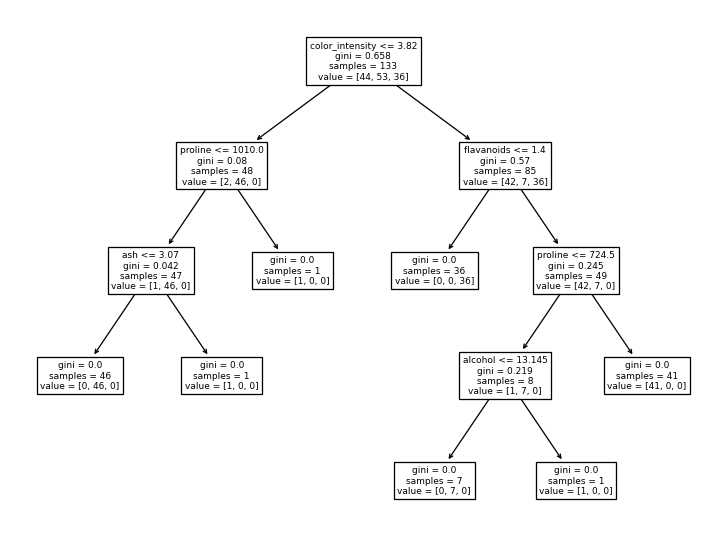

In [13]:
# criando o fig e o axes 
fig, ax = plt.subplots(figsize=(8,6),dpi=92)

#criando o plot
plot_tree(tree, feature_names = x_train.columns,ax=ax)

#plotando o gráfico
plt.tight_layout();

falar que ficou ruim de enxergar, podemos limitar a visualização e colocar todos os hiperparâmetros

falar dos 3 pontos no final

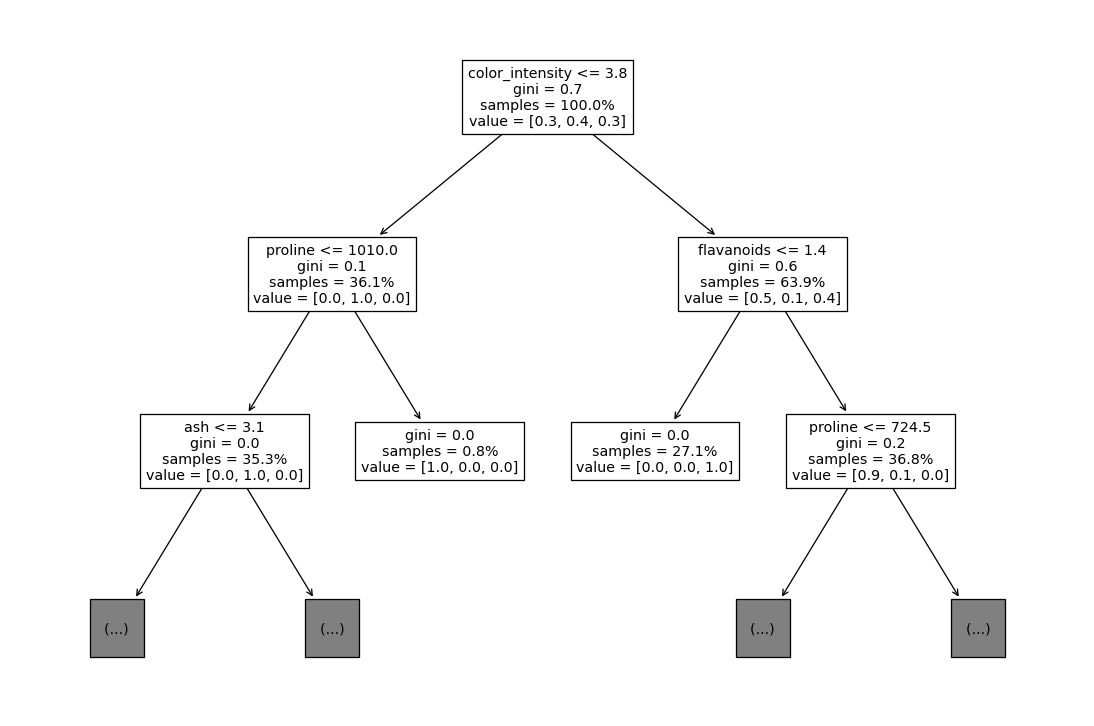

In [23]:
# criando o fig e o axes 
fig, ax = plt.subplots(figsize=(12,8),dpi=92)

#criando o plot
plot_tree(tree, # a decision tree que será plotada
          feature_names = x.columns, # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          max_depth=2, # <- escolhemos a profundidade da árvore
          #proportion = True <- retorna a proporção dos valores das amostras
          )

#plotando o gráfico
plt.tight_layout();

explicar o gini, samples, value etc
* Como ela decide cada atributo?

Outro método interessante das árvores de decisão é o `feature_importances_`. Este método traz um score de quais atributos melhor ajudaram o modelo a aprender sobre os dados.

Para calcular este score o scikit-learn utiliza o [gini importance]().

* terminar


In [19]:
#criando um dicionário com as variáveis
dic = {'score':tree.feature_importances_,'features':x_train.columns}

#criando um dataframe com os dados
pd.DataFrame(dic).sort_values('score',ascending=False)

,score,features
6,0.415894,flavanoids
9,0.403317,color_intensity
12,0.138457,proline
2,0.022351,ash
0,0.019982,alcohol
1,0.000000,malic_acid
3,0.000000,alcalinity_of_ash
4,0.000000,magnesium
5,0.000000,total_phenols
7,0.000000,nonflavanoid_phenols


In [ ]:
#fazer um gráfico

visualizando através do export_graphviz [link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz)
* explicar o que é DOT format

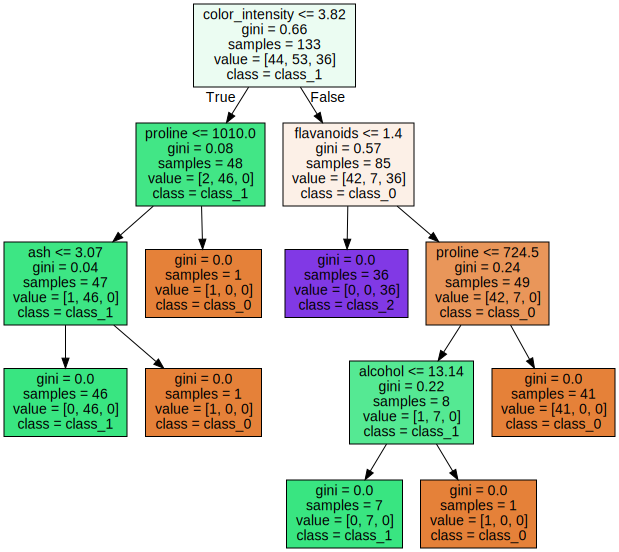

In [17]:
# exportando uma árvore de decisão em DOT format
dot_data = export_graphviz(tree, # árvore de decisão a ser exportada
                out_file = None,  # nome do arquivo output
                feature_names = x_train.columns, # retornar com as features
                precision=2, # número de digitos da precisão
                filled = True, # -
                class_names=['class_0','class_1','class_2']) # lista do nome das classes
                #special_characters=True, # 
                #label = 'root', # as informações das features aparecem apenas na raíz
                #leaves_parallel = True) # faz com que as folhas fiquem paralelas
                #rotate = True); # retorna a árvore na horizontal

graph = graphviz.Source(dot_data)
graph

representação textual da árvore de decisão

In [18]:
print(export_text(tree, # árvore de decisão treinada
                  show_weights=True, # retorna o número de amostras de cada classe
                  spacing=7))

|------- feature_9 <= 3.82
|       |------- feature_12 <= 1010.00
|       |       |------- feature_2 <= 3.07
|       |       |       |------- weights: [0.00, 46.00, 0.00] class: 1
|       |       |------- feature_2 >  3.07
|       |       |       |------- weights: [1.00, 0.00, 0.00] class: 0
|       |------- feature_12 >  1010.00
|       |       |------- weights: [1.00, 0.00, 0.00] class: 0
|------- feature_9 >  3.82
|       |------- feature_6 <= 1.40
|       |       |------- weights: [0.00, 0.00, 36.00] class: 2
|       |------- feature_6 >  1.40
|       |       |------- feature_12 <= 724.50
|       |       |       |------- feature_0 <= 13.14
|       |       |       |       |------- weights: [0.00, 7.00, 0.00] class: 1
|       |       |       |------- feature_0 >  13.14
|       |       |       |       |------- weights: [1.00, 0.00, 0.00] class: 0
|       |       |------- feature_12 >  724.50
|       |       |       |------- weights: [41.00, 0.00, 0.00] class: 0



# Referências

* [COMPARATIVE STUDY ID3, CART AND C4.5 
DECISION TREE ALGORITHM: A SURVEY](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.685.4929&rep=rep1&type=pdf)
* [User Guide Decision Tree Sklearn](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)
*[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)
*[Documentação do DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*[Decision tree learning - Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)